In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [91]:
df = pd.read_csv('data/updated_train_revised.csv')
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Lajpat Nagar,New Delhi Railway Station,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Nehru Place,New Delhi Railway Station,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Janakpuri,India Gate,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,New Delhi Railway Station,Hauz Khas,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Vasant Kunj,India Gate,Bus,49


In [92]:
df.shape

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')


There are 473285 rows and 10 columns


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473285 entries, 0 to 473284
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ride_id          473285 non-null  int64 
 1   seat_number      473285 non-null  object
 2   payment_method   473285 non-null  object
 3   payment_receipt  473285 non-null  object
 4   travel_date      473285 non-null  object
 5   travel_time      473285 non-null  object
 6   travel_from      473285 non-null  object
 7   travel_to        473285 non-null  object
 8   car_type         473285 non-null  object
 9   max_capacity     473285 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 36.1+ MB


In [94]:
df.duplicated().value_counts()

False    458905
True      14380
Name: count, dtype: int64

In [95]:
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [96]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [97]:
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,473285,473285,473285,473285,473285,473285,473285,473285
unique,61,2,51645,149,78,12,12,2
top,1,Mpesa,164HMVZXZW,10-12-17,7:09,Hauz Khas,Lajpat Nagar,Bus
freq,18903,472253,10,7881,36009,39650,40063,293019


In [98]:
df.describe()

,ride_id,max_capacity
count,473285.000000,473285.000000
mean,10187.690461,34.526463
std,2211.651904,18.452963
min,1442.000000,11.000000
25%,8286.000000,11.000000
50%,10352.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


In [99]:
df.head(3)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Lajpat Nagar,New Delhi Railway Station,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Nehru Place,New Delhi Railway Station,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Janakpuri,India Gate,Bus,49


In [100]:
df['ride_id'].unique()

array([ 1442,  5437,  5710, ...,  6041,  9966, 10316], dtype=int64)

In [84]:
temp_df = df.groupby('ride_id')['seat_number'].count().reset_index()
temp_df.rename(columns = {'seat_number':'number_of_ticket'},inplace=True)
temp_df.head()

,ride_id,number_of_ticket
0,1442,8
1,5437,9
2,5710,10
3,5777,44
4,5778,283


In [101]:
df.drop(['seat_number','payment_method','payment_receipt','travel_to'],axis=1, inplace=True)
df.shape

(473285, 6)

In [102]:
df.drop_duplicates('ride_id',inplace=True)
df.shape

(6249, 6)

In [103]:
df = df.merge(temp_df, how='left', on='ride_id')
df.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket
0,1442,17-10-17,7:15,Lajpat Nagar,Bus,49,8
1,5437,19-11-17,7:12,Nehru Place,Bus,49,9
2,5710,26-11-17,7:05,Janakpuri,Bus,49,10
3,5777,27-11-17,7:10,New Delhi Railway Station,Bus,49,44
4,5778,27-11-17,7:12,Vasant Kunj,Bus,49,283


In [104]:
df['date_time'] = pd.to_datetime(df['travel_date'] +" "+ df['travel_time'])
df['travel_date'] = pd.to_datetime(df['travel_date'])
#df['travel_time'] = pd.to_datetime(df['travel_time'])

C:\Users\mayan\AppData\Local\Temp\ipykernel_18500\943518647.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_time'] = pd.to_datetime(df['travel_date'] +" "+ df['travel_time'])
C:\Users\mayan\AppData\Local\Temp\ipykernel_18500\943518647.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['travel_date'] = pd.to_datetime(df['travel_date'])


In [105]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Total tickets from each origin place')

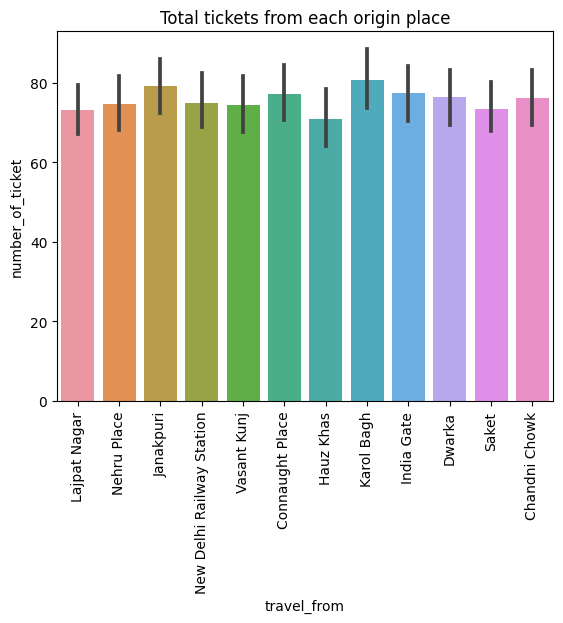

In [106]:
sns.barplot(data=df,x='travel_from',y='number_of_ticket')
plt.xticks(rotation=90)
plt.title('Total tickets from each origin place')

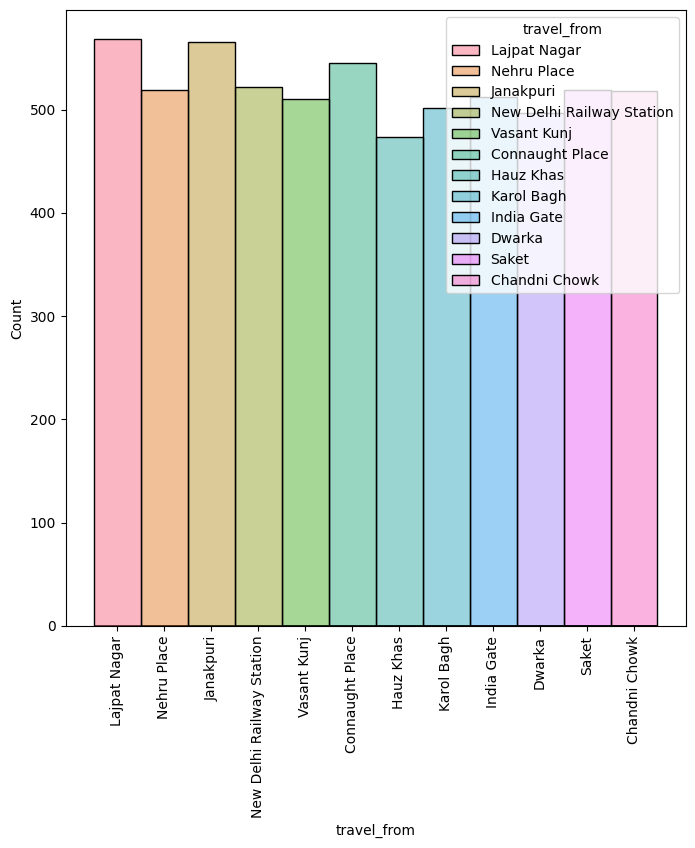

In [107]:
plt.figure(figsize=(8,8))
sns.histplot(data=df,x='travel_from',hue='travel_from')
plt.xticks(rotation=90)
plt.show()

In [108]:
df_copy = df.copy()

In [109]:
df_copy.head(1)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time
0,1442,2017-10-17,7:15,Lajpat Nagar,Bus,49,8,2017-10-17 07:15:00


In [110]:
#Creating additonal features with travel_date and travel_time columns
def create_date_cols(df_temp):
  df_temp['travel_month'] = df_temp['travel_date'].dt.month
  df_temp['travel_year'] = df_temp['travel_date'].dt.year
  df_temp['travel_day_of_month'] = df_temp['travel_date'].dt.day
  df_temp['travel_day_of_year'] = df_temp['travel_date'].dt.dayofyear
  df_temp['travel_day_of_week'] = df_temp['travel_date'].dt.dayofweek
  df_temp['travel_hour'] = pd.to_datetime(df_temp['travel_time']).dt.hour
  df_temp['quarter'] = df_temp['travel_date'].dt.quarter
  df_temp['is_weekend'] = df_temp['travel_day_of_week'].apply(lambda x: 1 if x in [5,6] else 0)

  return df_temp

df_copy = create_date_cols(df_copy)

In [111]:
df_copy.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date_time', 'travel_month',
       'travel_year', 'travel_day_of_month', 'travel_day_of_year',
       'travel_day_of_week', 'travel_hour', 'quarter', 'is_weekend'],
      dtype='object')

In [112]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend
0,1442,2017-10-17,7:15,Lajpat Nagar,Bus,49,8,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0
1,5437,2017-11-19,7:12,Nehru Place,Bus,49,9,2017-11-19 07:12:00,11,2017,19,323,6,7,4,1
2,5710,2017-11-26,7:05,Janakpuri,Bus,49,10,2017-11-26 07:05:00,11,2017,26,330,6,7,4,1
3,5777,2017-11-27,7:10,New Delhi Railway Station,Bus,49,44,2017-11-27 07:10:00,11,2017,27,331,0,7,4,0
4,5778,2017-11-27,7:12,Vasant Kunj,Bus,49,283,2017-11-27 07:12:00,11,2017,27,331,0,7,4,0


In [113]:
#Converting travel time into integer format
df['travel_time'] = df['travel_time'].str.split(':').apply(lambda x: int(x[0]) + int(x[1])/60 )

In [114]:
#Creating periods for time intervals
def get_period(hour):
  if hour<7: return 'em'
  elif hour>=7 and hour<=11: return 'mor'
  elif hour>11 and hour<=15: return 'an'
  elif hour>15 and hour<=19: return 'evn'
  elif hour>19 and hour<=24: return 'nght'

df_copy['time_period_of_day'] = df_copy['travel_hour'].apply(get_period)

In [115]:
df_copy.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day
0,1442,2017-10-17,7:15,Lajpat Nagar,Bus,49,8,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0,mor
1,5437,2017-11-19,7:12,Nehru Place,Bus,49,9,2017-11-19 07:12:00,11,2017,19,323,6,7,4,1,mor
2,5710,2017-11-26,7:05,Janakpuri,Bus,49,10,2017-11-26 07:05:00,11,2017,26,330,6,7,4,1,mor
3,5777,2017-11-27,7:10,New Delhi Railway Station,Bus,49,44,2017-11-27 07:10:00,11,2017,27,331,0,7,4,0,mor
4,5778,2017-11-27,7:12,Vasant Kunj,Bus,49,283,2017-11-27 07:12:00,11,2017,27,331,0,7,4,0,mor


<Axes: xlabel='travel_day_of_week', ylabel='Count'>

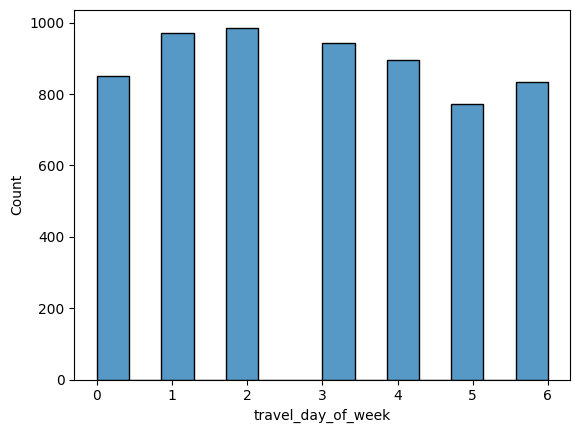

In [116]:
sns.histplot(df_copy['travel_day_of_week'])

<Axes: xlabel='travel_day_of_week', ylabel='number_of_ticket'>

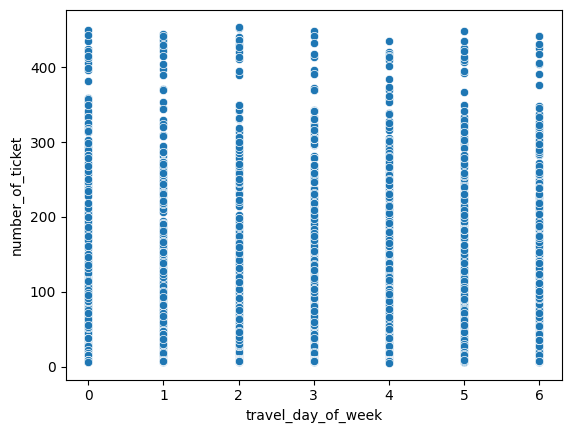

In [117]:
sns.scatterplot(data=df_copy, x='travel_day_of_week',y='number_of_ticket')

<Axes: xlabel='travel_day_of_month', ylabel='Count'>

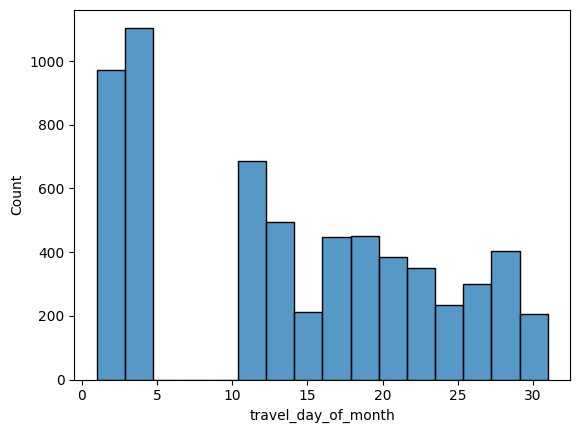

In [118]:
sns.histplot(df_copy['travel_day_of_month'])

<Axes: xlabel='travel_day_of_month', ylabel='number_of_ticket'>

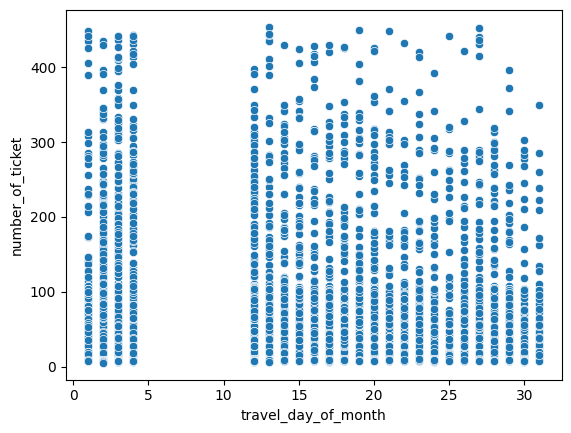

In [119]:
sns.scatterplot(data=df_copy, x='travel_day_of_month',y='number_of_ticket',cmap='viridis')

<Axes: xlabel='travel_month', ylabel='Count'>

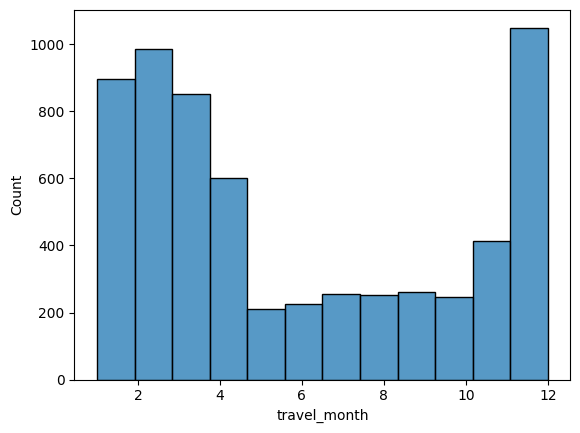

In [120]:
sns.histplot(df_copy['travel_month'],bins=12)

<Axes: xlabel='travel_hour', ylabel='number_of_ticket'>

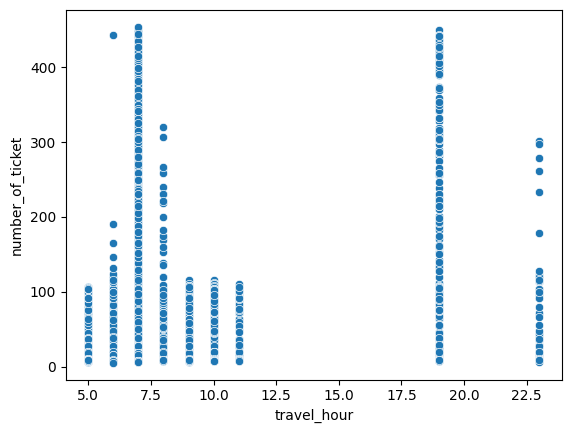

In [121]:
sns.scatterplot(data=df_copy, x='travel_hour',y='number_of_ticket',cmap='viridis')

<Axes: xlabel='time_period_of_day', ylabel='number_of_ticket'>

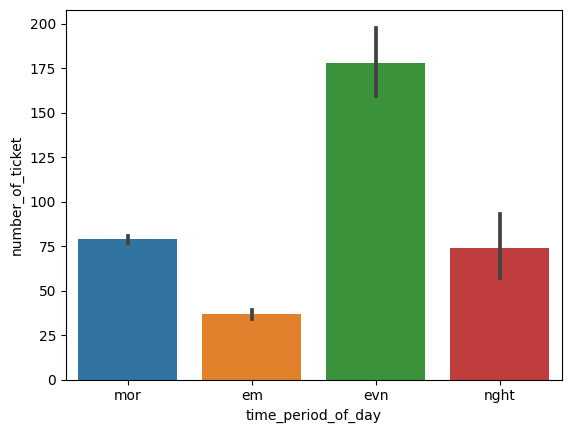

In [122]:
sns.barplot(data=df_copy, x='time_period_of_day',y='number_of_ticket')

<Axes: xlabel='travel_day_of_year', ylabel='number_of_ticket'>

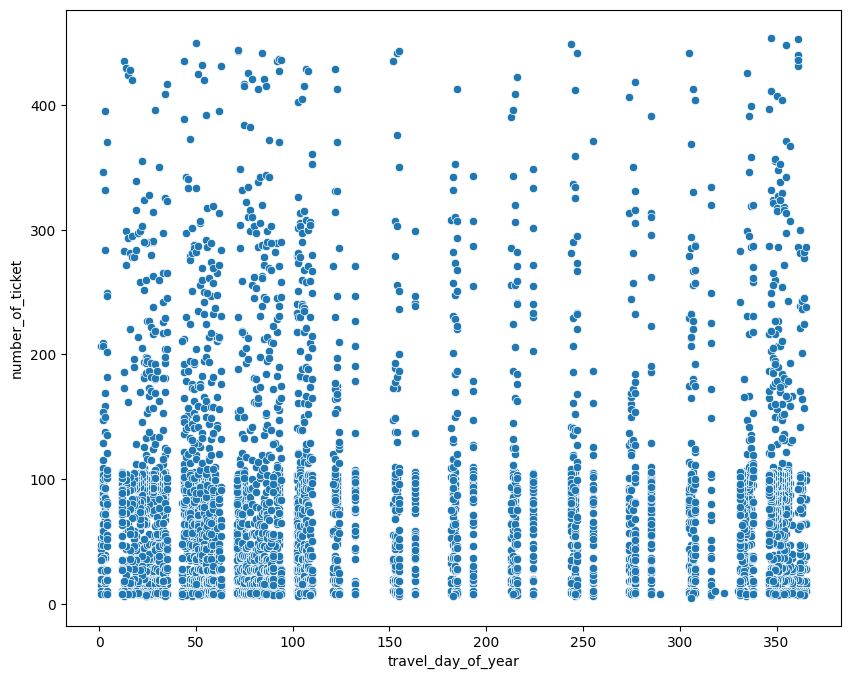

In [123]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=df_copy, x='travel_day_of_year',y='number_of_ticket',cmap='viridis')

In [124]:
df_copy.head(1)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day
0,1442,2017-10-17,7:15,Lajpat Nagar,Bus,49,8,2017-10-17 07:15:00,10,2017,17,290,1,7,4,0,mor


Text(0.5, 1.0, 'Number of tickets for each day of the month')

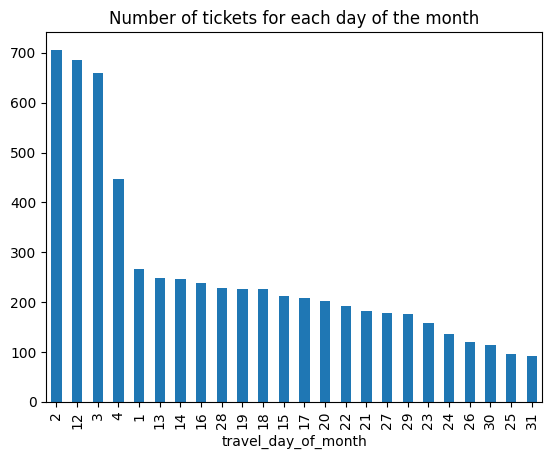

In [125]:
df_copy['travel_day_of_month'].value_counts().plot(kind='bar')
plt.title('Number of tickets for each day of the month')

{'mor': 392535, 'evn': 40011, 'em': 36217, 'nght': 4522}


<Axes: xlabel='time_period_of_day'>

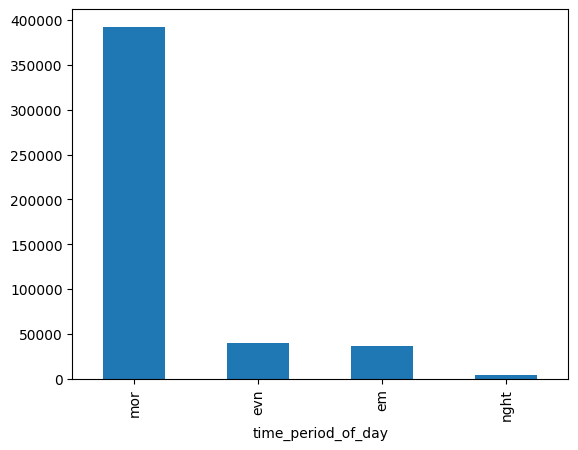

In [479]:
print(dict(df_copy.time_period_of_day.value_counts()))

df_copy['time_period_of_day'].value_counts().plot(kind='bar')

In [126]:
period_dict = dict(df_copy.time_period_of_day.value_counts())
df_copy['travel_hour_wise_weights'] = np.log1p(df_copy.time_period_of_day.map(period_dict))

# Creating a seperate column for giving day of a year wise weights for the hours column
day_of_year_dict = dict(df_copy.travel_day_of_year.value_counts())
df_copy['travel_day_of_year_wise_weights'] = np.log1p(df_copy.travel_day_of_year.map(day_of_year_dict))

# Giving weights to the each days of the month based on the frequency of ticket bookings
day_of_month_wise_weights_dict = {2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3, 17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4}
df_copy['travel_day_of_month_wise_weights'] = df_copy.travel_day_of_month.replace(day_of_month_wise_weights_dict)

# Creating a column for giving weights to the each months of a year based on the frequency of ticket bookings
travel_month_wise_weights_dict = {12: 1,
 2: 1,
 1: 1,
 3: 1,
 4: 1,
 11: 2,
 9: 3,
 7: 3,
 8: 3,
 10: 3,
 6: 3,
 5: 3}
df_copy['travel_month_wise_weights'] = df_copy.travel_month.replace(travel_month_wise_weights_dict)

In [127]:
df_copy.head(3)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,...,travel_day_of_year,travel_day_of_week,travel_hour,quarter,is_weekend,time_period_of_day,travel_hour_wise_weights,travel_day_of_year_wise_weights,travel_day_of_month_wise_weights,travel_month_wise_weights
0,1442,2017-10-17,7:15,Lajpat Nagar,Bus,49,8,2017-10-17 07:15:00,10,2017,...,290,1,7,4,0,mor,8.512382,0.693147,3,3
1,5437,2017-11-19,7:12,Nehru Place,Bus,49,9,2017-11-19 07:12:00,11,2017,...,323,6,7,4,1,mor,8.512382,0.693147,3,2
2,5710,2017-11-26,7:05,Janakpuri,Bus,49,10,2017-11-26 07:05:00,11,2017,...,330,6,7,4,1,mor,8.512382,0.693147,4,2


In [128]:
def find_difference_bw_bus(data):

  data.sort_values(["travel_from","date_time"],inplace=True,ascending=True)
  data["Time_gap_btw_0_1_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_1_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_2_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(2)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_next_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(-3)).dt.total_seconds()/3600
  data["Time_gap_btw_0_3_previous_bus"]=(data["date_time"]-data.groupby(["travel_from"]).date_time.shift(3)).dt.total_seconds()/3600
  data["Time_gap_btw_next_previous_bus"]=(data.groupby(["travel_from"]).date_time.shift(-1)-data.groupby(["travel_from"]).date_time.shift(1)).dt.total_seconds()/3600
  cols=["Time_gap_btw_0_1_next_bus", "Time_gap_btw_0_1_previous_bus", "Time_gap_btw_0_2_next_bus","Time_gap_btw_0_2_previous_bus",
      "Time_gap_btw_0_3_next_bus", "Time_gap_btw_0_3_previous_bus",
      "Time_gap_btw_next_previous_bus"]
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="ffill")
  data[cols]=data.groupby(["travel_from"])[cols].fillna(method="backfill")


  return data

In [129]:
transport_data_new = find_difference_bw_bus(df_copy)

In [130]:
transport_data_new.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'car_type',
       'max_capacity', 'number_of_ticket', 'date_time', 'travel_month',
       'travel_year', 'travel_day_of_month', 'travel_day_of_year',
       'travel_day_of_week', 'travel_hour', 'quarter', 'is_weekend',
       'time_period_of_day', 'travel_hour_wise_weights',
       'travel_day_of_year_wise_weights', 'travel_day_of_month_wise_weights',
       'travel_month_wise_weights', 'Time_gap_btw_0_1_next_bus',
       'Time_gap_btw_0_1_previous_bus', 'Time_gap_btw_0_2_next_bus',
       'Time_gap_btw_0_2_previous_bus', 'Time_gap_btw_0_3_next_bus',
       'Time_gap_btw_0_3_previous_bus', 'Time_gap_btw_next_previous_bus'],
      dtype='object')

In [131]:
transport_data_new.isnull().sum()

ride_id                             0
travel_date                         0
travel_time                         0
travel_from                         0
car_type                            0
max_capacity                        0
number_of_ticket                    0
date_time                           0
travel_month                        0
travel_year                         0
travel_day_of_month                 0
travel_day_of_year                  0
travel_day_of_week                  0
travel_hour                         0
quarter                             0
is_weekend                          0
time_period_of_day                  0
travel_hour_wise_weights            0
travel_day_of_year_wise_weights     0
travel_day_of_month_wise_weights    0
travel_month_wise_weights           0
Time_gap_btw_0_1_next_bus           0
Time_gap_btw_0_1_previous_bus       0
Time_gap_btw_0_2_next_bus           0
Time_gap_btw_0_2_previous_bus       0
Time_gap_btw_0_3_next_bus           0
Time_gap_btw

In [132]:
transport_data_new.dropna(inplace=True)

In [133]:
from datetime import datetime
from datetime import timedelta

In [134]:
transport_data_new['travel_from'].unique()

array(['Chandni Chowk', 'Connaught Place', 'Dwarka', 'Hauz Khas',
       'India Gate', 'Janakpuri', 'Karol Bagh', 'Lajpat Nagar',
       'Nehru Place', 'New Delhi Railway Station', 'Saket', 'Vasant Kunj'],
      dtype=object)

In [135]:
# distance_from_nairobi = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
# 'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
# 'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}

# Making a dictionary containing distances of originating places from nairobi
distance_from_nairobi = {'Awendo':351, 'Homa Bay':360, 'Kehancha': 387.7, 'Keroka': 280, 'Keumbu':295, 'Kijauri':271,
                         'Kisii':305.1, 'Mbita':401, 'Migori': 370, 'Ndhiwa': 371, 'Nyachenge':326, 'Rodi':348, 'Rongo':332,
                         'Sirare':392, 'Sori':399}

transport_data_new['distance_to_destination'] = transport_data_new['travel_from'].map(distance_from_nairobi)

In [136]:
dict_time = dict(transport_data_new.groupby('travel_from')['travel_hour'].mean().round(2))
dict_time

{'Chandni Chowk': 8.09,
 'Connaught Place': 7.84,
 'Dwarka': 8.01,
 'Hauz Khas': 8.05,
 'India Gate': 7.92,
 'Janakpuri': 7.9,
 'Karol Bagh': 7.82,
 'Lajpat Nagar': 7.97,
 'Nehru Place': 7.86,
 'New Delhi Railway Station': 7.9,
 'Saket': 7.98,
 'Vasant Kunj': 8.05}

In [137]:
transport_data_new.groupby('travel_from')['travel_hour_wise_weights'].mean()

travel_from
Chandni Chowk                8.092953
Connaught Place              8.160820
Dwarka                       8.036501
Hauz Khas                    8.106137
India Gate                   8.095429
Janakpuri                    8.139519
Karol Bagh                   8.100354
Lajpat Nagar                 8.145392
Nehru Place                  8.093667
New Delhi Railway Station    8.103232
Saket                        8.090027
Vasant Kunj                  8.055873
Name: travel_hour_wise_weights, dtype: float64

In [138]:
transport_data_new['time_to_nairobi'] = transport_data_new['travel_hour']

In [139]:
from sklearn import preprocessing
final_df = pd.get_dummies(df_copy, columns = ['travel_from','travel_day_of_month_wise_weights','travel_month_wise_weights'])

In [140]:
label_encoder = {'Bus':1,'shuttle':0}
final_df.replace(label_encoder, inplace=True)
final_df.head()

,ride_id,travel_date,travel_time,car_type,max_capacity,number_of_ticket,date_time,travel_month,travel_year,travel_day_of_month,...,travel_from_New Delhi Railway Station,travel_from_Saket,travel_from_Vasant Kunj,travel_day_of_month_wise_weights_1,travel_day_of_month_wise_weights_2,travel_day_of_month_wise_weights_3,travel_day_of_month_wise_weights_4,travel_month_wise_weights_1,travel_month_wise_weights_2,travel_month_wise_weights_3
320,6398,2017-01-12,5:30,0,11,105,2017-01-12 05:30:00,1,2017,12,...,False,False,False,True,False,False,False,True,False,False
4961,12293,2017-01-12,7:07,1,49,8,2017-01-12 07:07:00,1,2017,12,...,False,False,False,True,False,False,False,True,False,False
4912,12288,2017-01-12,8:00,0,11,54,2017-01-12 08:00:00,1,2017,12,...,False,False,False,True,False,False,False,True,False,False
4939,12321,2017-01-12,10:20,0,11,92,2017-01-12 10:20:00,1,2017,12,...,False,False,False,True,False,False,False,True,False,False
4928,12310,2017-01-12,10:40,0,11,84,2017-01-12 10:40:00,1,2017,12,...,False,False,False,True,False,False,False,True,False,False


In [141]:
cols_to_drop = ['ride_id','travel_date','travel_time','max_capacity','travel_year','number_of_ticket','time_period_of_day','date_time']
X = final_df.drop(cols_to_drop,axis=1)
X.shape

(6249, 38)

In [142]:
y = final_df['number_of_ticket'].values
y.shape

(6249,)

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
import math

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
X_train.shape

(4999, 38)

In [146]:
y_train.shape

(4999,)

In [169]:
#Creating function for evaluation metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Initials model
models ={
  "DecisionTree": DecisionTreeRegressor(random_state=42),
  "RandomForest": RandomForestRegressor(random_state=42)
}
def evaluate_metric(actual,predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))

  print('R2 Score is {}'.format(r2_score(actual, predicted)))
  # print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  # print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [150]:
from sklearn.tree import DecisionTreeRegressor

criterion = ['squared_error', 'friedman_mse', 'absolute_error']

max_depth = [int(x) for x in np.linspace(40, 100, num = 4)]
max_depth.append(None)

grid_params_dict = {'criterion': criterion,
               'max_depth': max_depth,
                    }
print(grid_params_dict)

{'criterion': ['squared_error', 'friedman_mse', 'absolute_error'], 'max_depth': [40, 60, 80, 100, None]}


In [151]:
from sklearn.model_selection import GridSearchCV

In [152]:
dt_reg = DecisionTreeRegressor()

df_grid_reg = GridSearchCV(estimator=dt_reg, param_grid=grid_params_dict, cv=3, verbose=2, n_jobs=-1)

df_grid_reg.fit(X_train,y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [40, 60, 80, 100, None]},
             verbose=2)

In [153]:
df_grid_reg.best_params_

{'criterion': 'friedman_mse', 'max_depth': None}

In [154]:
df_grid_reg.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse')

In [155]:
df_optimal_model =df_grid_reg.best_estimator_
y_train_pred = df_optimal_model.predict(X_train)

evaluate_metric(y_train,y_train_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 0.0
RMSE is 0.0
R2 Score is 1.0
Adjusted R2 :  1.0


In [156]:
y_test_pred = df_optimal_model.predict(X_test)

evaluate_metric(y_test,y_test_pred)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 11759.8744
RMSE is 108.44295458903727
R2 Score is -0.8554548339401182
Adjusted R2 :  -0.9136771986715175


In [168]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(rfr.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [158]:
n_estimators = [int(x) for x in np.linspace(start = 400, stop = 1000, num = 4)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(40, 100, num = 4)]
max_depth.append(None)

# Create the parameters grid
grid_params_dict = {'n_estimators': n_estimators,
               'max_depth': max_depth,
                    }
pprint(grid_params_dict)

{'max_depth': [40, 60, 80, 100, None], 'n_estimators': [400, 600, 800, 1000]}


In [161]:
rfr = RandomForestRegressor()

# Grid Search of parameters, using 3 fold cross validation,
rf_gridCV = GridSearchCV(estimator = rfr, param_grid = grid_params_dict, cv = 3, verbose=2, n_jobs = -1)

# Fit the random search model
rf_gridCV.fit(X, y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [40, 60, 80, 100, None],
                         'n_estimators': [400, 600, 800, 1000]},
             verbose=2)

In [162]:
rf_gridCV.best_params_

{'max_depth': None, 'n_estimators': 600}

In [163]:
rf_gridCV.best_estimator_

RandomForestRegressor(n_estimators=600)

In [164]:
rf_grid_optimal_model =rf_gridCV.best_estimator_
y_train_pred_gridCV = rf_grid_optimal_model.predict(X_train)

evaluate_metric(y_train,y_train_pred_gridCV)
print("Adjusted R2 : ",1-(1-r2_score((y_train), (y_train_pred_gridCV)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))

MSE is 770.219441416061
RMSE is 27.752827629199533
R2 Score is 0.8768343014506632
Adjusted R2 :  0.8758906932762933


In [165]:
y_test_pred_gridCV = rf_grid_optimal_model.predict(X_test)


evaluate_metric(y_test,y_test_pred_gridCV)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_test_pred_gridCV)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE is 769.7886574644444
RMSE is 27.745065461527467
R2 Score is 0.8785439336320907
Adjusted R2 :  0.8747327606164172


In [170]:
best_model= models["RandomForest"]



In [171]:
import joblib 

joblib.dump(best_model,"Route_management.pkl")
joblib.dump(label_encoder,"label_encoder.pkl")

['label_encoder.pkl']